In [1]:
import quimb as qu

n = 18
H = qu.ham_heis(n, sparse=True).real
psi0 = qu.rand_product_state(n)

In [2]:
# check normalization
qu.expectation(psi0, psi0)

1.0000000000000009

In [3]:
# find the initial energy
qu.expec(H, psi0)

-0.2840098784046047

In [4]:
def compute(t, pt):
    """Perform computation at time ``t`` with state ``pt``.
    """
    dims = [2] * n
    lns = [qu.logneg_subsys(pt, dims, i, i + 1) for i in range(n - 1)]
    mis = [qu.mutinf_subsys(pt, dims, i, i + 1) for i in range(n - 1)]
    return t, lns, mis

In [5]:
evo = qu.Evolution(psi0, H, compute=compute, progbar=True)
evo.update_to(5)

100%|##########| 100/100 [00:08<00:00, 15.22%/s]


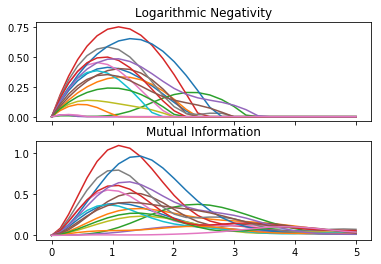

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

ts, lns, mis = zip(*evo.results)

fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(ts, lns);
axs[0].set_title("Logarithmic Negativity")
axs[1].plot(ts, mis);
axs[1].set_title("Mutual Information")

plt.show()